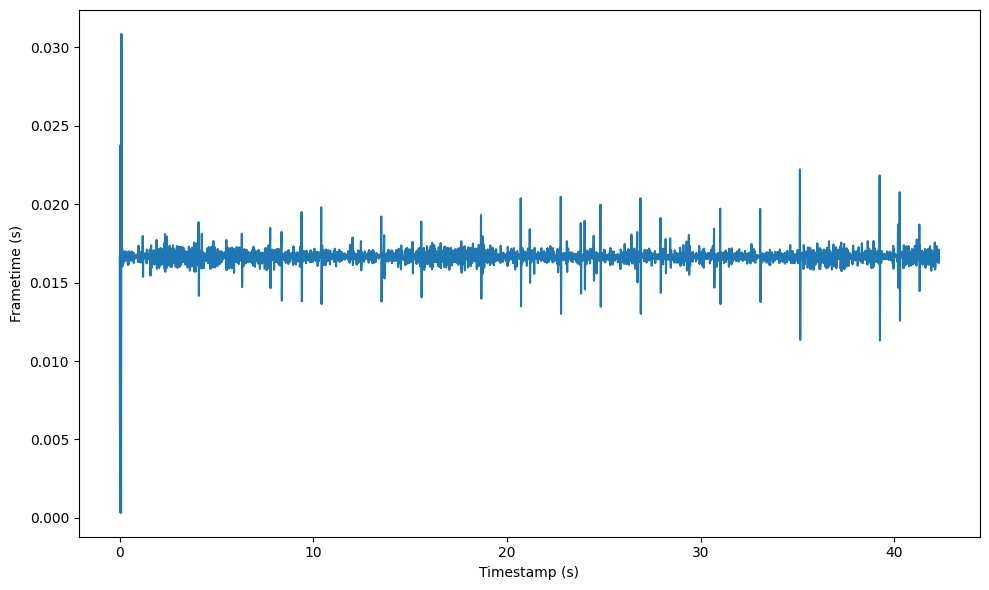

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import re

header_re = re.compile("^\\((.+)\\) \\[([0-9]+)s([0-9]+)ns\\]: (.+)$")
frametimes = []
mouse_positions = []
mouse_clicks = {}
with open("log.txt") as log:
  for line in log.readlines():
    tag, seconds, nanoseconds, rest = header_re.search(line).groups()
    time = float(seconds) + float(nanoseconds)/1e9
    if tag == 'FrameTime':
      ftime = float(rest[0:rest.find(" ")])
      frametimes.append((time, ftime))
    if tag == 'Mouse':
      parts = rest.split(" ")
      if parts[0] == 'pos':
        x, y = map(lambda x: float(x), parts[1].split(","))
        mouse_positions.append((time, (x,y)))
      if parts[0] == 'clicked':
        x, y = map(lambda x: float(x), parts[1].split(","))
        mouse_clicks[time] = ((x,y),None)
    if tag == 'Select':
      parts = rest.split(" ")
      text = parts[1:]
      mouse_clicks[time] = (mouse_clicks[time][0],text)

def plot_data(data, label):
  timestamps = [item[0] for item in data]
  values = [item[1] for item in data]

  plt.plot(timestamps, values, label=label)

plt.figure(figsize=(10,6))

plot_data(frametimes, 'frametimes')

plt.xlabel("Timestamp (s)")
plt.ylabel("Frametime (s)")
plt.tight_layout()
plt.show()


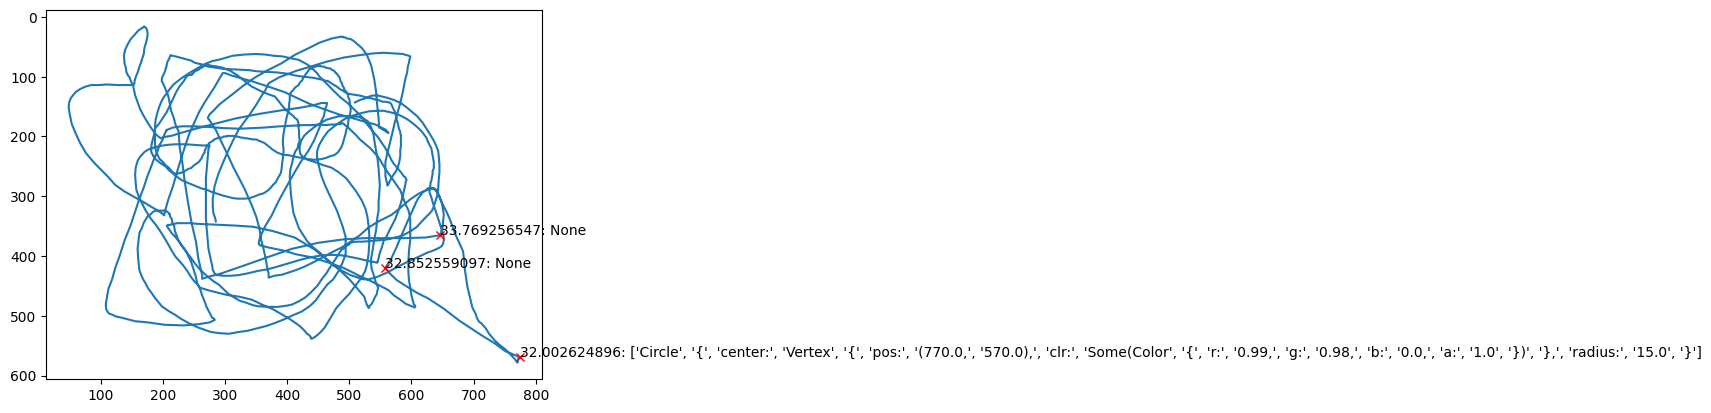

In [19]:
#fig, ax = plt.subplot()
plt.plot([item[1][0] for item in mouse_positions], [item[1][1] for item in mouse_positions], label="mouse position")
for k,v in mouse_clicks.items():
  plt.plot(v[0][0], v[0][1], 'rx', label="mouse clicks")
  plt.text(v[0][0], v[0][1], f"{k}: {v[1]}")

ax = plt.gca()
ax.invert_yaxis() # nw is 0,0

plt.show()